In [ ]:
#pip install yfinance

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
from datetime import date, timedelta
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

In [4]:
# تاریخ امروز را نمایش بده
today = date.today()
today

datetime.date(2024, 9, 30)

In [8]:
# تاریخ امروز را با فرمت زیر که مربوط به تاریخ هست نمایش بده
d1 = today.strftime("%Y-%m-%d")
end_date = d1
# داده های موردنیاز را تا 365 روز قبل تر جمع آوری کن
d2 = date.today() - timedelta(days = 365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [9]:
# داده های مربوط به سهام گوگل را از تاریخ شروع تا تاریخ پایان که دادیم دانلود کن
data = yf.download('GOOG', start = start_date, end = end_date, progress = False)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-02,132.154999,135.360001,132.065002,135.169998,134.838852,19210400
2023-10-03,134.929993,135.240005,132.815002,133.300003,132.973434,19628700
2023-10-04,133.660004,136.570007,133.429993,136.270004,135.936157,22848000
2023-10-05,136.130005,136.500000,134.455002,135.990005,135.656860,15922900
2023-10-06,134.940002,139.186005,134.940002,138.729996,138.390137,20819300


In [11]:
# ستون تاریخ که بعنوان ستون ایندکس می باشد از آن یک ستون ایجاد می کنیم 
data['Date'] = data.index
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2023-10-02,132.154999,135.360001,132.065002,135.169998,134.838852,19210400,2023-10-02
2023-10-03,134.929993,135.240005,132.815002,133.300003,132.973434,19628700,2023-10-03
2023-10-04,133.660004,136.570007,133.429993,136.270004,135.936157,22848000,2023-10-04
2023-10-05,136.130005,136.500000,134.455002,135.990005,135.656860,15922900,2023-10-05
2023-10-06,134.940002,139.186005,134.940002,138.729996,138.390137,20819300,2023-10-06


In [13]:
# ستون ها و داده های جدول دیتا را می نویسیم
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-10-02,2023-10-02,132.154999,135.360001,132.065002,135.169998,134.838852,19210400
2023-10-03,2023-10-03,134.929993,135.240005,132.815002,133.300003,132.973434,19628700
2023-10-04,2023-10-04,133.660004,136.570007,133.429993,136.270004,135.936157,22848000
2023-10-05,2023-10-05,136.130005,136.500000,134.455002,135.990005,135.656860,15922900
2023-10-06,2023-10-06,134.940002,139.186005,134.940002,138.729996,138.390137,20819300


In [54]:
# یک ریست برای ایندکس ها انجام می دهیم تا از عدد صفر ایندکس ها مرتب قرار گیرند
data.reset_index(drop=True, inplace=True)
data.head()

,Date,Close
0,2023-10-02,135.169998
1,2023-10-03,133.300003
2,2023-10-04,136.270004
3,2023-10-05,135.990005
4,2023-10-06,138.729996


In [55]:
# قیمت بسته شدن و همچنین تاریخ بسته شدن را نیاز داریم
data = data[["Date", "Close"]]
data.tail()

,Date,Close
245,2024-09-23,163.070007
246,2024-09-24,163.639999
247,2024-09-25,162.990005
248,2024-09-26,163.830002
249,2024-09-27,165.289993


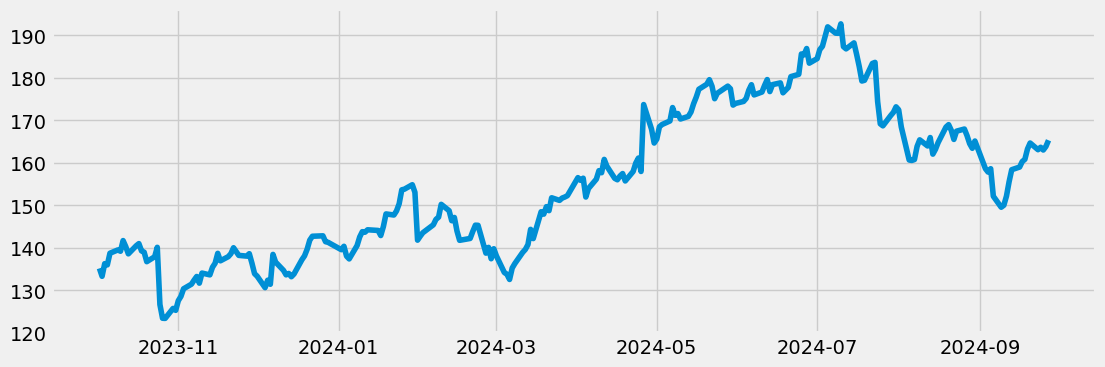

In [21]:
# نموداری از وضعیت گوگل رسم می کنیم و آن را بررسی می کنیم
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 4))
plt.plot(data["Date"], data["Close"]);

# چون داده های بصورت قابت نیستند و بصورت فصلی می باشند پس عدد d را برابر با یک در نظر می گیریم

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

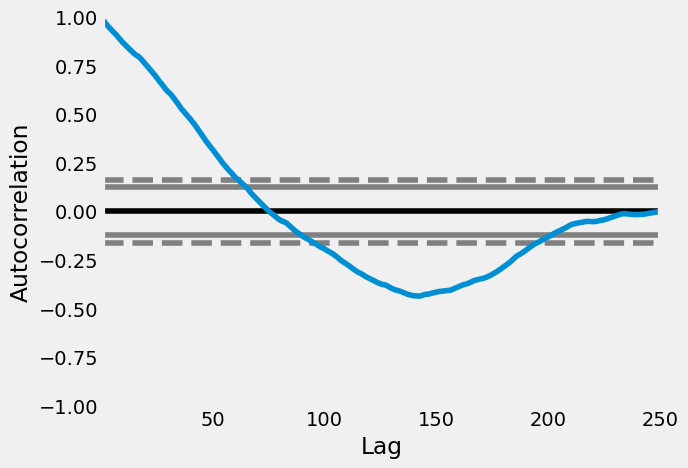

In [22]:
# با این روش مقدار p را بدست می آوریم
pd.plotting.autocorrelation_plot(data["Close"])
# نمودار پس از 5 خط اول به سمت پایین حرکت می کند پس مقدار p برابر با 5 هست

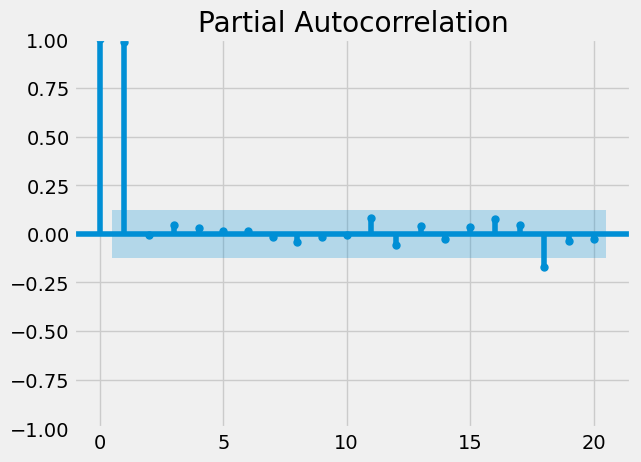

In [48]:
# مقدار q را بررسی می کنیم
plot_pacf(data["Close"], lags=20)
plt.show()
# از آنجایی که فقط دو نقطه از مابقی نقاط دور هستند پس مقدار q را برابر با 2 در نظر می گیریم

In [33]:
# از مدل Arima استفاده می کنیم
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))
fitted = model.fit()
print(fitted.summary())

C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -595.872
Date:                Mon, 30 Sep 2024   AIC                           1207.743
Time:                        21:52:34   BIC                           1235.883
Sample:                             0   HQIC                          1219.070
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5153      0.063     -8.186      0.000      -0.639      -0.392
ar.L2         -0.9813      0.096    -10.186      0.000      -1.170      -0.793
ar.L3         -0.0862      0.117     -0.734      0.4

C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
predictions = fitted.predict()
print(predictions)

Date
2023-10-02      0.000000
2023-10-03    135.169986
2023-10-04    133.322303
2023-10-05    136.283975
2023-10-06    136.021363
                 ...    
2024-09-23    164.054914
2024-09-24    163.637323
2024-09-25    163.686125
2024-09-26    162.295339
2024-09-27    163.999875
Name: predicted_mean, Length: 250, dtype: float64


In [ ]:
# مدل ARIMA مدل مناسبی برای داده های فصلی نیست و بهتر هست از SARIMA استفاده کنید

In [36]:
# از مدل SARIMA استفاده می کنیم
# لازم به ذکر است عدد 12 یعنی یک دوره که ما در اینجا چون 365 روز را در نظر گرفتیم و هر یک سال برابر 12 هست این عدد را قرار دادیم
model=sm.tsa.statespace.SARIMAX(data['Close'], order=(p, d, q), seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -583.277
Date:                            Mon, 30 Sep 2024   AIC                           1196.553
Time:                                    21:59:57   BIC                           1248.574
Sample:                                         0   HQIC                          1217.521
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0293      1.895      0.015      0.988      -3.684       3.743
ar.L2          0.5267      1.624   

In [52]:
# پیش بینی داده های 10 روز آینده را انجام می دهیم
predictions = model.predict(len(data), len(data)+10)
print(predictions)

250    164.229294
251    164.948216
252    164.831633
253    164.704048
254    166.494821
255    166.554975
256    166.245570
257    166.739470
258    165.072511
259    165.817786
260    166.362291
Name: predicted_mean, dtype: float64


C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

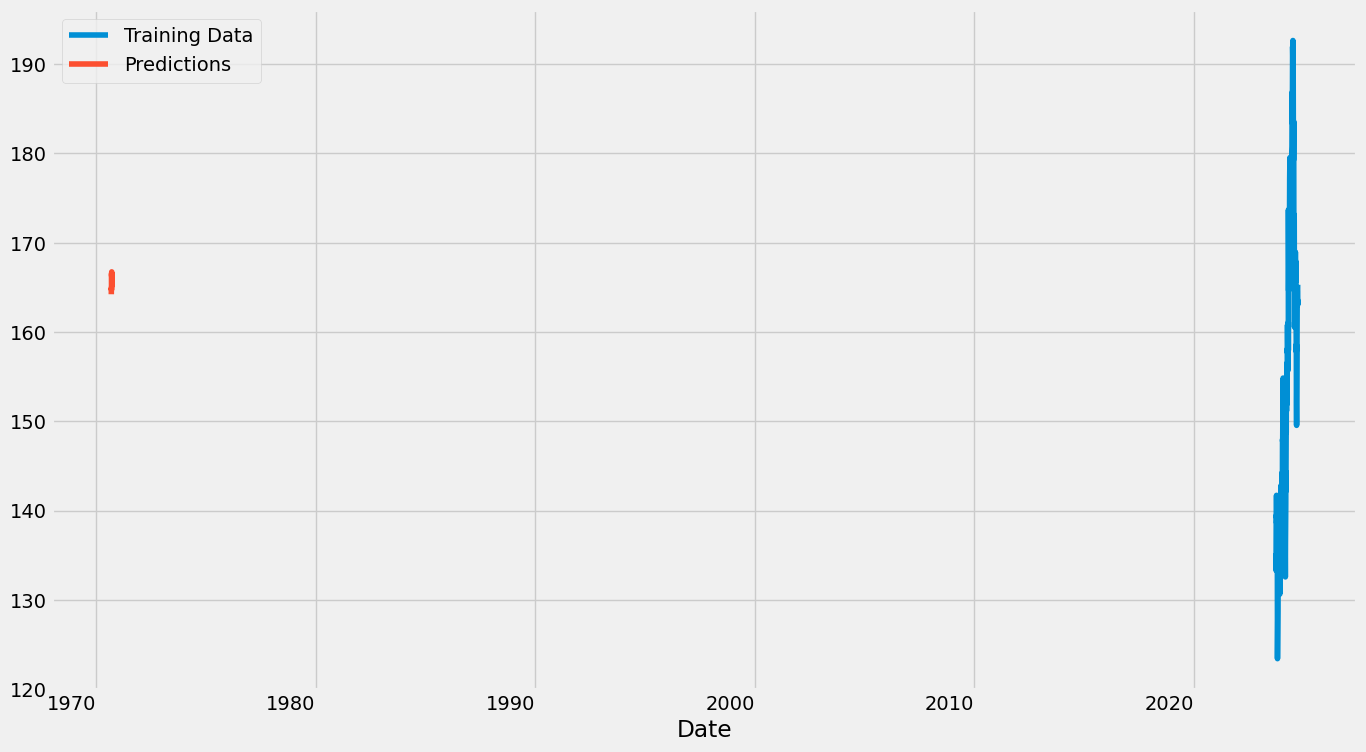

In [53]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")